**IMPORTING LIBRARIES**

In [1]:

import pandas as pd     # For data analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import yfinance as yf  #For fetching the real time data

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error   #For applying machine learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


**DATA COLLECTION**

In [4]:

tickers = ['AAPL', 'MSFT', 'TSLA', 'GOOGL']
start_date = '2019-03-01'
end_date = '2020-04-30'


In [5]:
# Download stock data
combined_data = pd.DataFrame()
for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data['Ticker'] = ticker
    combined_data = pd.concat([combined_data, stock_data])

[*********************100%***********************]  1 of 1 completed

C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\yfinance\utils.py:689: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



[*********************100%***********************]  1 of 1 completed

C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\yfinance\utils.py:689: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



[*********************100%***********************]  1 of 1 completed

C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\yfinance\utils.py:689: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\yfinance\utils.py:689: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



[*********************100%***********************]  1 of 1 completed


In [6]:
combined_data.reset_index(inplace=True)
combined_data.to_csv('raw_stock_data.csv', index=False)


**DATA PREPROCESSING AND FEATURE ENGINEERING**

In [7]:
combined_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2019-03-01,43.570000,43.787498,43.222500,43.742500,41.959030,103544800,AAPL
1,2019-03-04,43.922501,44.437500,43.492500,43.962502,42.170071,109744800,AAPL
2,2019-03-05,43.985001,44.000000,43.634998,43.882500,42.093323,78949600,AAPL
3,2019-03-06,43.667500,43.872501,43.485001,43.630001,41.851128,83241600,AAPL
4,2019-03-07,43.467499,43.610001,43.005001,43.125000,41.366711,99185600,AAPL


In [8]:
combined_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
1171,2020-04-23,63.286999,64.407501,63.026501,63.558498,63.328926,34202000,GOOGL
1172,2020-04-24,62.750000,63.885502,62.200001,63.830002,63.599445,37402000,GOOGL
1173,2020-04-27,64.599998,64.705002,63.252998,63.542999,63.313480,44186000,GOOGL
1174,2020-04-28,64.160004,64.237999,61.519001,61.629501,61.406895,80700000,GOOGL
1175,2020-04-29,67.250000,68.007500,66.336502,67.109001,66.866608,108358000,GOOGL


In [9]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1176 non-null   datetime64[ns]
 1   Open       1176 non-null   float64       
 2   High       1176 non-null   float64       
 3   Low        1176 non-null   float64       
 4   Close      1176 non-null   float64       
 5   Adj Close  1176 non-null   float64       
 6   Volume     1176 non-null   int64         
 7   Ticker     1176 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 73.6+ KB


In [10]:
combined_data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1176,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1.176000e+03
mean,2019-09-28 22:56:19.591836672,72.246633,73.101312,71.412687,72.311024,70.096127,9.579308e+07
min,2019-03-01 00:00:00,12.073333,12.445333,11.799333,11.931333,11.931333,8.989200e+06
25%,2019-06-14 00:00:00,46.930875,47.933125,46.310000,47.176250,45.538007,2.705282e+07
50%,2019-09-28 12:00:00,60.122252,60.710001,59.552750,60.292500,59.734459,7.145925e+07
75%,2020-01-14 00:00:00,88.178749,89.149376,87.828127,88.947502,85.741987,1.251511e+08
max,2020-04-29 00:00:00,190.649994,190.699997,186.470001,188.699997,180.488815,9.140820e+08
std,NaN,45.440637,45.845542,44.974025,45.440893,42.951010,9.507052e+07


***HANDLING MISSING VALUES***

In [11]:
combined_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
dtype: int64

In [12]:

def calculate_moving_averages(data, windows):  #Here data means dataframe and windows is the list of integers 
    for window in windows:
        data[f'MA_{window}'] = data['Adj Close'].rolling(window=window).mean()
    return data

In [13]:
#RSI is the change in the price movements.It determines whether a stock is overbought or oversold
# RSI = 100 + (100/1+RS) where RS= Avg loss/Avg Gain

def calculate_rsi(data, window=14):
    delta = data['Adj Close'].diff(1)   #difference of daily price change
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))
    return data

In [14]:
combined_data = combined_data.groupby('Ticker').apply(lambda df: calculate_moving_averages(df, [20, 50]))
combined_data = combined_data.groupby('Ticker').apply(calculate_rsi)


C:\Users\Khushi\AppData\Local\Temp\ipykernel_9952\539154530.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_data = combined_data.groupby('Ticker').apply(lambda df: calculate_moving_averages(df, [20, 50]))


ValueError: 'Ticker' is both an index level and a column label, which is ambiguous.

In [15]:
combined_data.fillna(method='ffill', inplace=True)
combined_data.dropna(inplace=True)

C:\Users\Khushi\AppData\Local\Temp\ipykernel_9952\2610606265.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


In [16]:
combined_data.to_csv('preprocessed_stock_data.csv', index=False)

In [17]:
scaler = MinMaxScaler()
scaled_data = combined_data.copy()
scaled_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
scaled_data[scaled_columns] = scaler.fit_transform(combined_data[scaled_columns])


**EXPLORATORY DATA ANALYSIS**

In [18]:
sns.set(style='whitegrid')

***Closing price of each company over time***

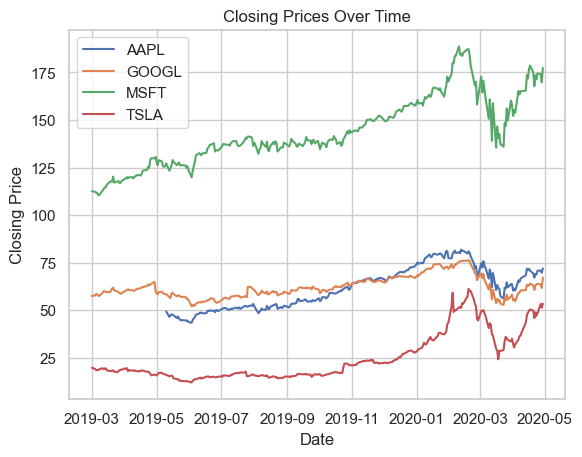

In [19]:

for ticker in combined_data['Ticker'].unique():
    company_data = combined_data[combined_data['Ticker'] == ticker]
    plt.plot(company_data['Date'], company_data['Close'], label=ticker)

plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


***Adjusted closing price for all companies***

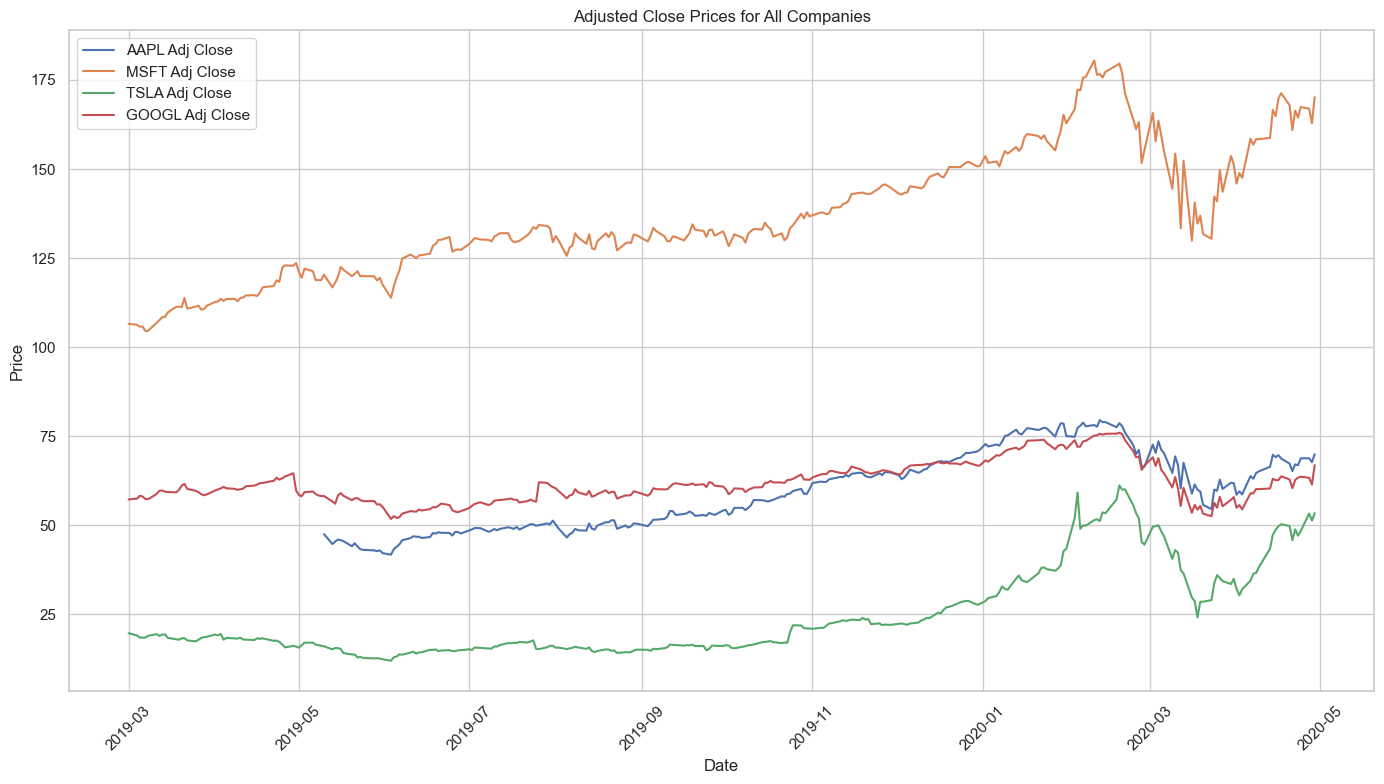

In [20]:
plt.figure(figsize=(14, 8))
for ticker in tickers:
    ticker_data = combined_data[combined_data['Ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Adj Close'], label=f'{ticker} Adj Close')
plt.title('Adjusted Close Prices for All Companies')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Moving averages of 20 day and 50 day of all companies***


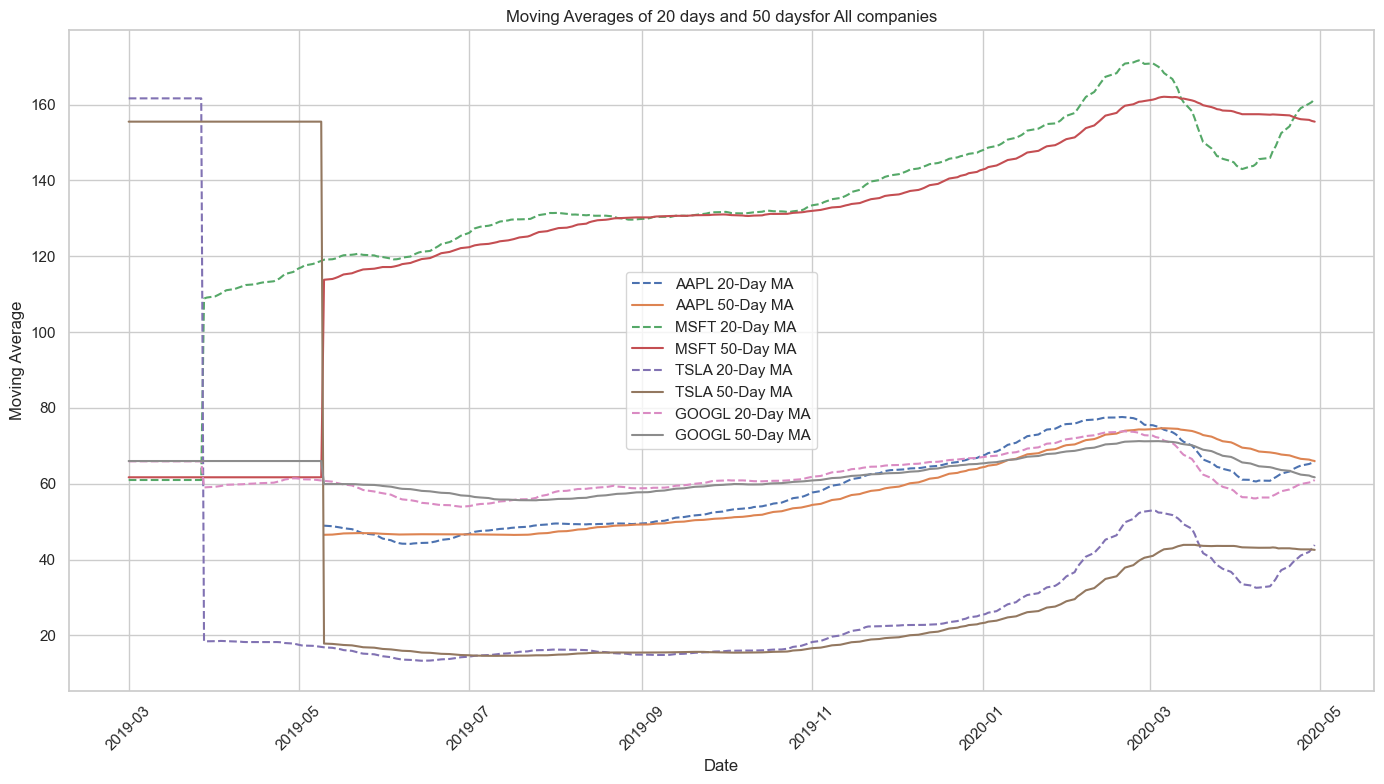

In [21]:
plt.figure(figsize=(14, 8))
for ticker in tickers:
    ticker_data = combined_data[combined_data['Ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['MA_20'], label=f'{ticker} 20-Day MA', linestyle='--')
    plt.plot(ticker_data['Date'], ticker_data['MA_50'], label=f'{ticker} 50-Day MA', linestyle='-')
plt.title('Moving Averages of 20 days and 50 daysfor All companies')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Plot of adjusted close price and Moving averages of Apple***

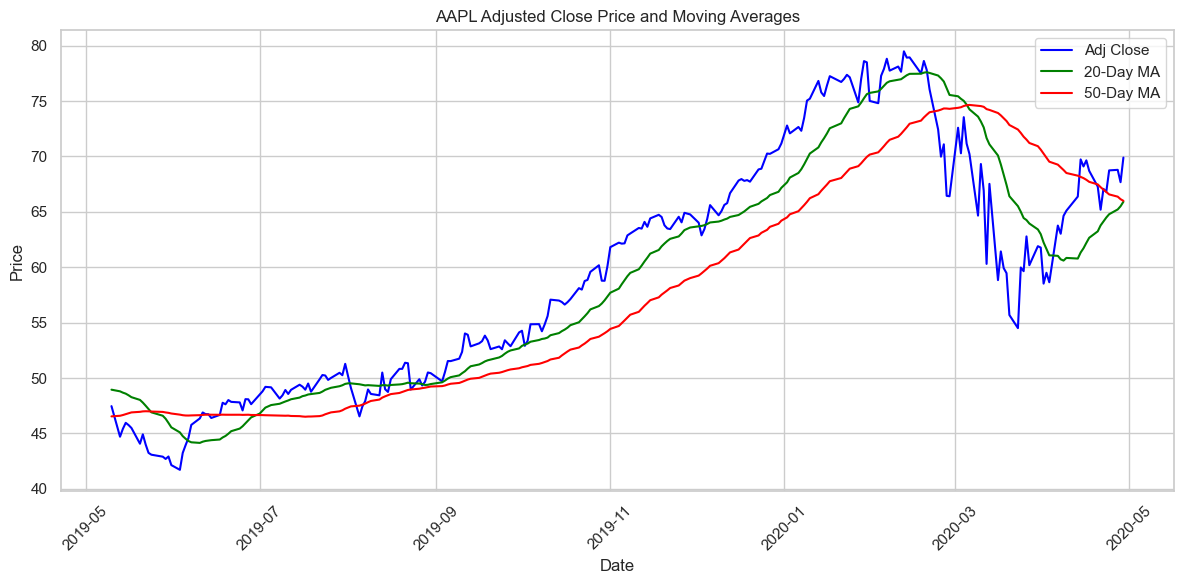

In [22]:
plt.figure(figsize=(12, 6))
aapl_data = combined_data[combined_data['Ticker'] == 'AAPL']
plt.plot(aapl_data['Date'], aapl_data['Adj Close'], label='Adj Close', color='blue')
plt.plot(aapl_data['Date'], aapl_data['MA_20'], label='20-Day MA', color='green')
plt.plot(aapl_data['Date'], aapl_data['MA_50'], label='50-Day MA', color='red')
plt.title('AAPL Adjusted Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Here if the adjusted closing price is above the moving averages it is a uptrend otherwise it is a downtrend.

***Plot of adjusted close price and Moving averages of Microsoft***

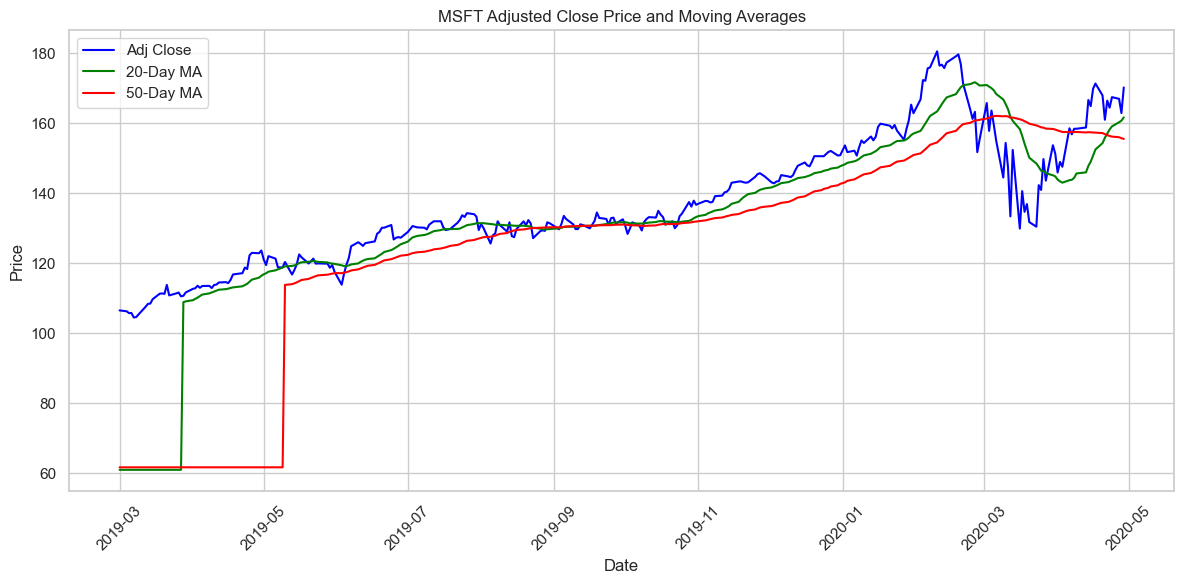

In [23]:
plt.figure(figsize=(12, 6))
aapl_data = combined_data[combined_data['Ticker'] == 'MSFT']
plt.plot(aapl_data['Date'], aapl_data['Adj Close'], label='Adj Close', color='blue')
plt.plot(aapl_data['Date'], aapl_data['MA_20'], label='20-Day MA', color='green')
plt.plot(aapl_data['Date'], aapl_data['MA_50'], label='50-Day MA', color='red')
plt.title('MSFT Adjusted Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***Plot of adjusted close price and Moving averages of Tesla***

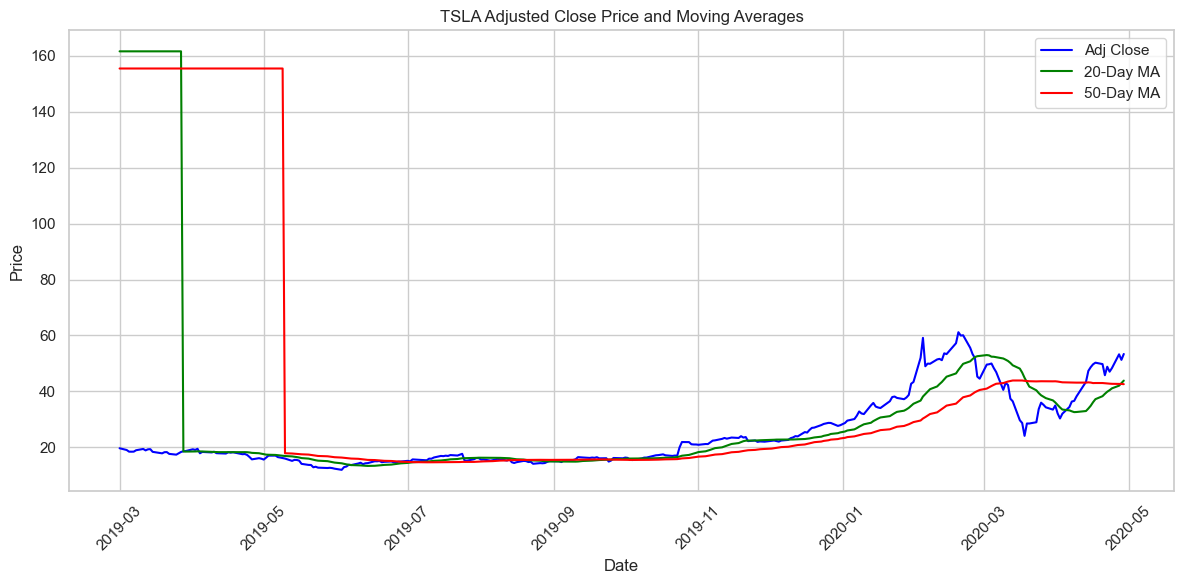

In [24]:
plt.figure(figsize=(12, 6))
aapl_data = combined_data[combined_data['Ticker'] == 'TSLA']
plt.plot(aapl_data['Date'], aapl_data['Adj Close'], label='Adj Close', color='blue')
plt.plot(aapl_data['Date'], aapl_data['MA_20'], label='20-Day MA', color='green')
plt.plot(aapl_data['Date'], aapl_data['MA_50'], label='50-Day MA', color='red')
plt.title('TSLA Adjusted Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***Plot of adjusted close price and Moving averages of Google***

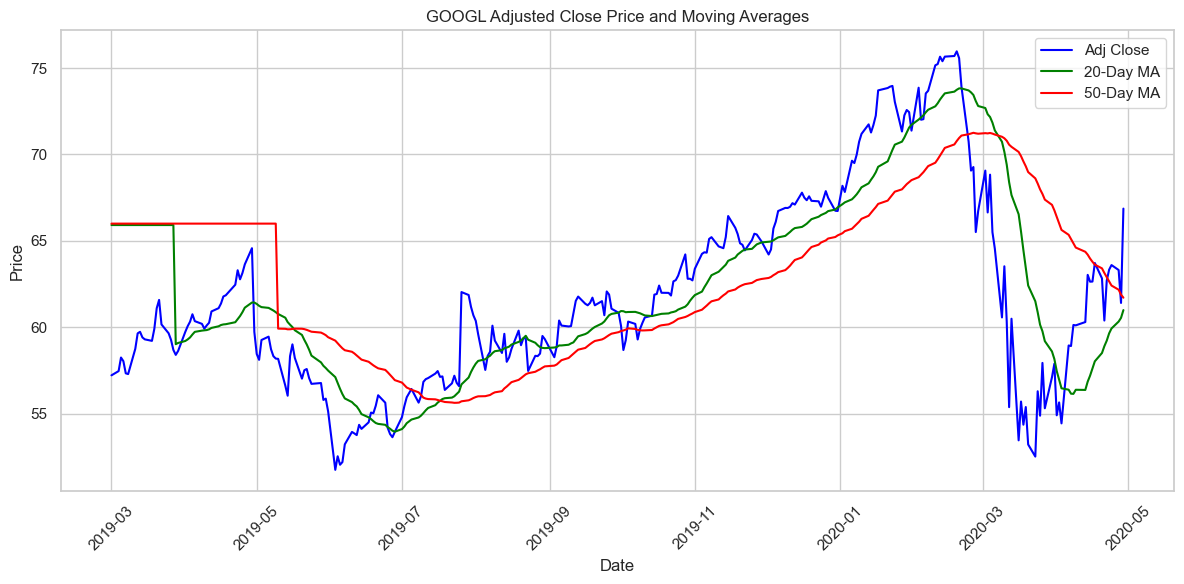

In [25]:
plt.figure(figsize=(12, 6))
aapl_data = combined_data[combined_data['Ticker'] == 'GOOGL']
plt.plot(aapl_data['Date'], aapl_data['Adj Close'], label='Adj Close', color='blue')
plt.plot(aapl_data['Date'], aapl_data['MA_20'], label='20-Day MA', color='green')
plt.plot(aapl_data['Date'], aapl_data['MA_50'], label='50-Day MA', color='red')
plt.title('GOOGL Adjusted Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***Volume***

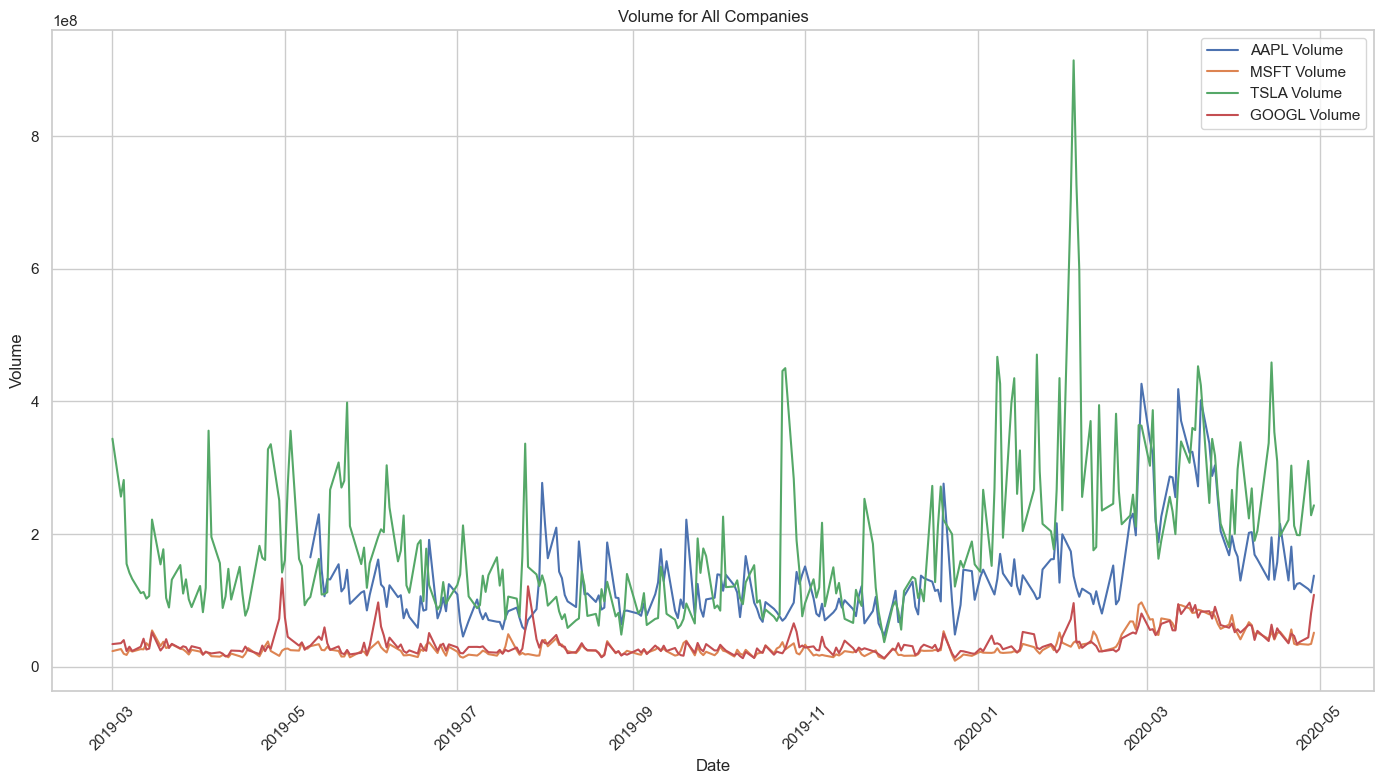

In [26]:
plt.figure(figsize=(14, 8))
for ticker in tickers:
    ticker_data = combined_data[combined_data['Ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Volume'], label=f'{ticker} Volume')
plt.title('Volume for All Companies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        labels.append(data[i+sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 50  # 50 days of historical data
train_data, test_data = {}, {}

for ticker in tickers:
    ticker_data = scaled_data[scaled_data['Ticker'] == ticker]
    close_prices = ticker_data['Adj Close'].values
    sequences, labels = create_sequences(close_prices, sequence_length)
    split_idx = int(len(sequences) * 0.8)
    train_data[ticker] = (sequences[:split_idx], labels[:split_idx])
    test_data[ticker] = (sequences[split_idx:], labels[split_idx:])


In [28]:
from sklearn.model_selection import KFold

In [29]:
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

models = {}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
training_accuracies, validation_accuracies = {}, {}

for ticker in tickers:
    X_train, y_train = train_data[ticker]
    training_accuracy, validation_accuracy = [], []
    for train_idx, val_idx in kfold.split(X_train):
        X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

        model = build_lstm_model((X_train_fold.shape[1], 1))
        model.fit(X_train_fold.reshape(-1, sequence_length, 1), y_train_fold, epochs=10, batch_size=16, verbose=1)

        train_predictions = model.predict(X_train_fold.reshape(-1, sequence_length, 1))
        val_predictions = model.predict(X_val_fold.reshape(-1, sequence_length, 1))

        train_acc = 1 - mean_absolute_error(y_train_fold, train_predictions)
        val_acc = 1 - mean_absolute_error(y_val_fold, val_predictions)

        training_accuracy.append(train_acc)
        validation_accuracy.append(val_acc)

    training_accuracies[ticker] = np.mean(training_accuracy)
    validation_accuracies[ticker] = np.mean(validation_accuracy)
    models[ticker] = model


   

C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 0.0384
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0055
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0032
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0018
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0013
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0012
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0015
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0012
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0011
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0014
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Epoch 1/10


C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.0495
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0067
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0031
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0013
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0017
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0018
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0014
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0014
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0014
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0012
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Epoch 1/10


C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 0.0396
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0068
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0026
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0019
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0018
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0018
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0015
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0018
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0013
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0010  
1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000260527F8CC0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing ten

C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0367
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0073
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0032
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0023
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0017
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0015
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0014
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0011
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0014
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0012
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Epoch 1/10


C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.0415
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0103
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0042
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0016
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0020
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0017
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0015
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0011
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0011
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0013
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Epoch 1/10


C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 0.3390
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0479
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0255
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0098
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0065
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0085
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0076
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0074
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0069
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0047
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/10


C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.3370
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0271
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0140
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0096
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0088
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0064
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0068
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0063
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0063
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0053
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/10


C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.3211
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0249
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0234
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0092
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0083
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0088
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0066
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0064
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0068
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0062
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/10


C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.3321
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0448
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0171
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0106
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0073
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0097
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0096
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0070
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0055
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0078
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/10


C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.3890
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0588
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0228
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0093
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0091
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0068
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0063
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0087
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0067
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0079
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Epoch 1/10


C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.0034
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0017
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 4.1493e-04
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 1.9595e-04
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 2.0657e-04
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 2.5690e-04
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 1.5204e-04
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 2.1546e-04
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 1.4141e-04
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 1.3678e-04
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Epoch 1/10


C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0036
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0013
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 3.7980e-04
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 3.6887e-04
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 2.2304e-04
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 2.8000e-04
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 2.5117e-04
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 3.8167e-04
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 1.7950e-04
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 2.7024e-04
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Epoch 1/10


C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0042
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0013
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 4.4304e-04
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 3.1447e-04
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 2.1243e-04
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 2.1965e-04
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 1.7079e-04
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 1.8084e-04
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 2.4225e-04
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 5.2941e-04
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/10


C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0030
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0013
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 7.0866e-04
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 1.8277e-04
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 2.1571e-04
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 2.8723e-04
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 2.9723e-04
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 2.0623e-04
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 2.4557e-04
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 1.4762e-04
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Epoch 1/10


C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0044
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0012
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 2.2156e-04
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 3.2488e-04
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 2.6613e-04
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 1.5480e-04
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 3.9027e-04
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 1.6362e-04
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 2.1728e-04
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 1.5628e-04
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Epoch 1/10


C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 0.0575
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0080
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0039
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0016
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0011
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0011
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0015
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0012
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0013
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0015
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Epoch 1/10


C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.0558
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0057
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0031
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0015
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0012
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0014
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0017
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0011
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 7.8407e-04
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0017
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/10


C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.0520
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0043
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0034
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0014
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0016
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0011
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0013
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 9.5019e-04
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0012
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0011
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/10


C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0716
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0099
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0041
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0019
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0014
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0015
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0013
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0017
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0012
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 8.8281e-04
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/10


C:\Users\Khushi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.0724
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0103
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0045
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0018
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0011
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0013
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0012
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0011
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0012
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0011
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


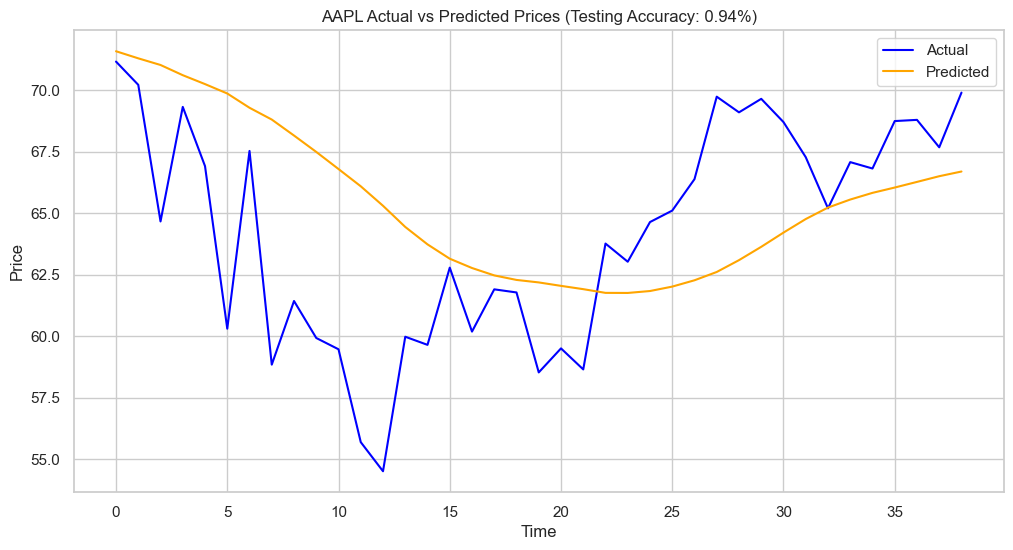

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


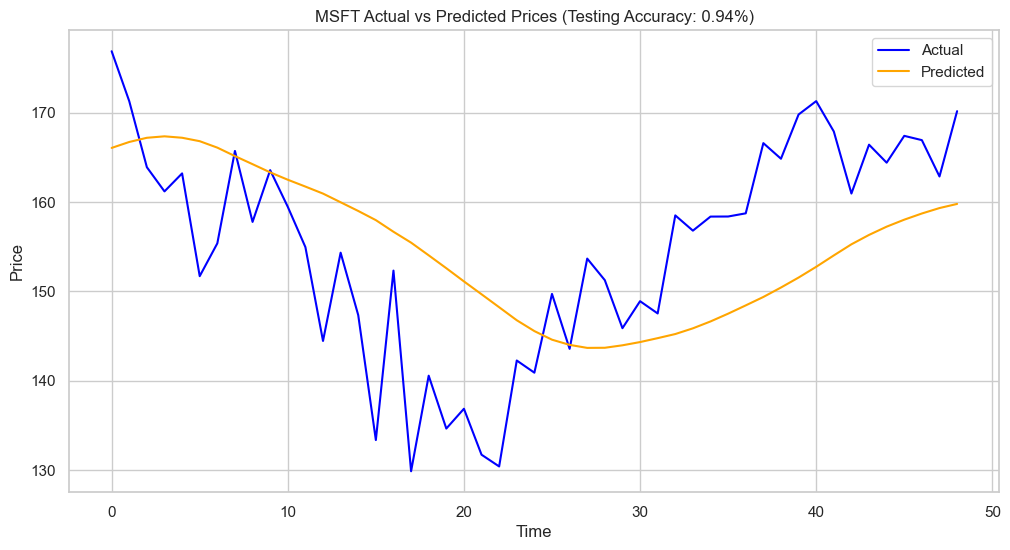

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


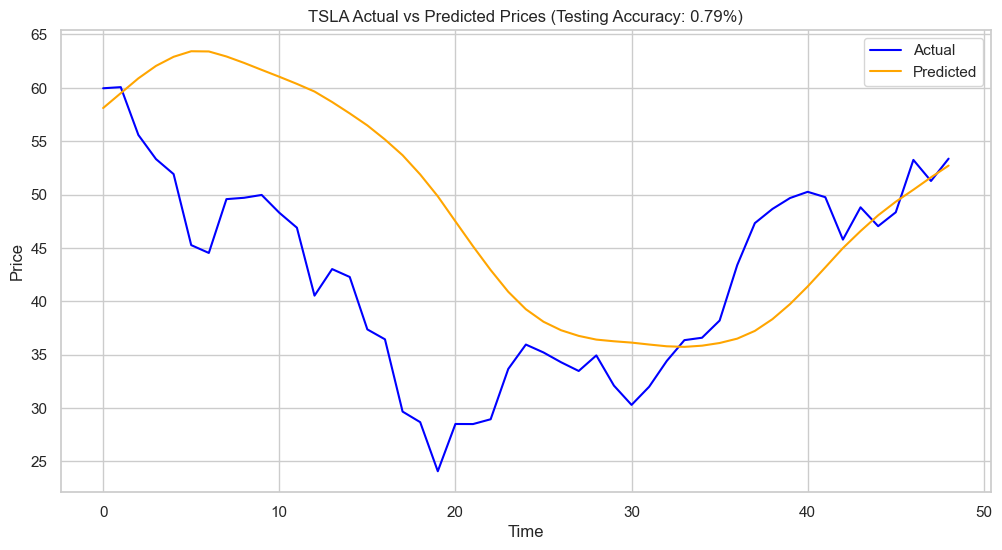

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


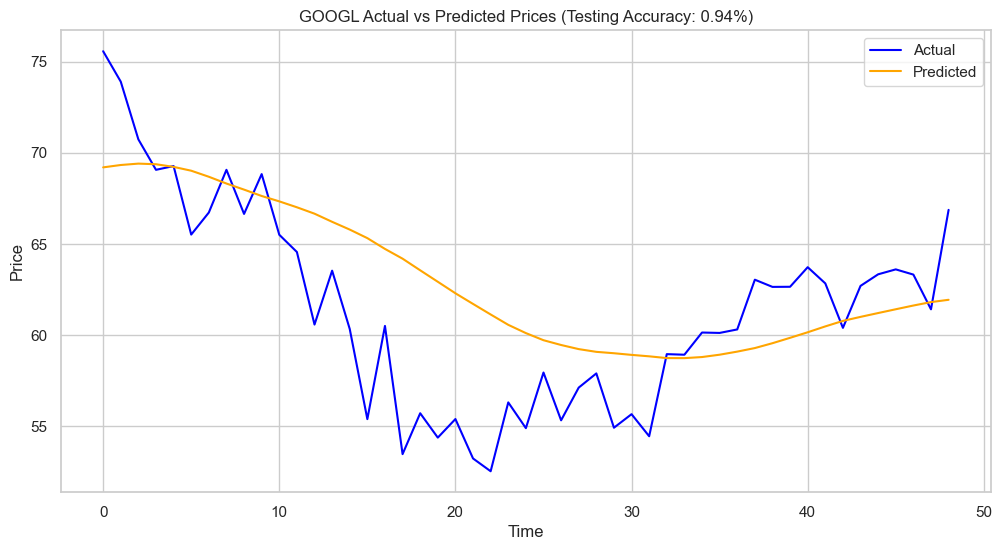

AAPL Testing Accuracy: 94.00%
MSFT Testing Accuracy: 93.72%
TSLA Testing Accuracy: 78.70%
GOOGL Testing Accuracy: 94.39%


In [30]:

predictions = {}
actuals = {}
testing_accuracies = {}

for ticker in tickers:
    X_test, y_test = test_data[ticker]
    model = models[ticker]
    predicted = model.predict(X_test.reshape(-1, sequence_length, 1))

    # Expand predicted and actual arrays to match the scaler's dimensions
    predicted_expanded = np.zeros((predicted.shape[0], len(scaled_columns)))
    actual_expanded = np.zeros((y_test.shape[0], len(scaled_columns)))

    predicted_expanded[:, scaled_columns.index('Adj Close')] = predicted.flatten()
    actual_expanded[:, scaled_columns.index('Adj Close')] = y_test.flatten()

    # Inverse transform to original scale
    predicted = scaler.inverse_transform(predicted_expanded)[:, scaled_columns.index('Adj Close')]
    actual = scaler.inverse_transform(actual_expanded)[:, scaled_columns.index('Adj Close')]

    predictions[ticker] = predicted
    actuals[ticker] = actual

    # Calculate Testing Accuracy (1 - Mean Absolute Error)
    mae = mean_absolute_error(actual, predicted)
    testing_accuracy = 1 - mae / np.mean(actual)  # Normalizing MAE for accuracy computation
    testing_accuracies[ticker] = testing_accuracy * 100  # Convert to percentage

    # Plot actual vs. predicted
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(actual)), actual, label='Actual', color='blue')
    plt.plot(range(len(predicted)), predicted, label='Predicted', color='orange')
    plt.title(f'{ticker} Actual vs Predicted Prices (Testing Accuracy: {testing_accuracy:.2f}%)')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Save results
results_df = pd.DataFrame()
for ticker in tickers:
    result = pd.DataFrame({
        'Actual': actuals[ticker],
        'Predicted': predictions[ticker],
        'Ticker': ticker
    })
    results_df = pd.concat([results_df, result])

results_df.to_csv('predictions_results.csv', index=False)

# Print Testing Accuracies
for ticker, accuracy in testing_accuracies.items():
    print(f'{ticker} Testing Accuracy: {accuracy:.2f}%')


In [31]:
for ticker in tickers:
    print(f"{ticker} - Training Accuracy: {training_accuracies[ticker]:.2%}, Validation Accuracy: {validation_accuracies[ticker]:.2%}")


AAPL - Training Accuracy: 98.31%, Validation Accuracy: 98.24%
MSFT - Training Accuracy: 97.38%, Validation Accuracy: 97.38%
TSLA - Training Accuracy: 99.11%, Validation Accuracy: 99.15%
GOOGL - Training Accuracy: 98.53%, Validation Accuracy: 98.51%


In [43]:
from sklearn.metrics import mean_absolute_error


overall_actual = []
overall_predicted = []

for ticker in tickers:
    overall_actual.extend(actuals[ticker])  
    overall_predicted.extend(predictions[ticker])  


overall_actual = np.array(overall_actual)
overall_predicted = np.array(overall_predicted)


overall_mae = mean_absolute_error(overall_actual, overall_predicted)
overall_accuracy = 1 - overall_mae / np.mean(overall_actual)

print(f"Overall MAE: {overall_mae:.2f}")
print(f"Overall Accuracy: {overall_accuracy:.2%}")


Overall MAE: 6.71
Overall Accuracy: 87.08%


In [44]:

for ticker in tickers:
    
    if ticker in actuals and ticker in predictions:
    
        mse = mean_squared_error(actuals[ticker], predictions[ticker])
        mae = mean_absolute_error(actuals[ticker], predictions[ticker])

        
        print(f'{ticker} - MSE: {mse:.2f}, MAE: {mae:.2f}')


AAPL - MSE: 23.64, MAE: 3.85
TSLA - MSE: 134.03, MAE: 8.99
